In [435]:
#import lib
import csv
import pandas as pd
import numpy as np
import string
import re
import nltk

# VISUALISASI
import matplotlib.pyplot as plt
import seaborn as sns

In [436]:
# input data
data = pd.read_csv('E:\Program\[2] Program\AnSent\Data\Data_5_Lex_sen\Lex_Indihome.csv')


In [437]:
# mengubah tipe data
# data['Data Teks_Stopword'] = data["Data Teks_Stopword"].astype(str)

In [438]:
# menghilangkan data kosong
data['Data Teks_Stemming']=data['Data Teks_Stemming'].fillna("")

# Relevan

### Network Quality

In [439]:
datanq = data.copy()

In [440]:
labels = {'lambat': 'Network Quality', 
          'wifi': 'Network Quality', 
          'internet': 'Network Quality', 
          'rusak': 'Network Quality'} 

def matcher(k):
    x = (i for i in labels if i in k.split(' '))
    return ' | '.join(map(labels.get, x))

datanq['kata_kunci'] = datanq['Data Teks_Stemming'].map(matcher)

In [441]:
datanq = datanq.drop(datanq[datanq.kata_kunci == ''].index) #menghapus baris kosong
datanq.to_csv('E:\Program\[2] Program\AnSent\Data\Data_7_Relev\IndiHome\Id_1_NQ.csv')

#### visualisasi

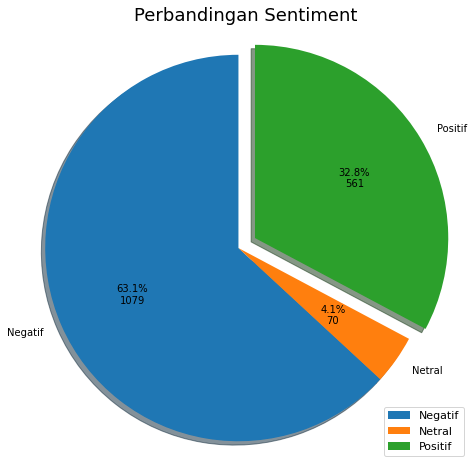

In [442]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)

sentimen = datanq['Data Teks_Stopword'].groupby(datanq['sentimen']).count().values

plt.figure(figsize = (8,8))
plt.pie(sentimen, explode=(0,0,0.1), labels=['Negatif', 'Netral','Positif'], shadow=True,
        autopct=lambda pct: pct_pie(pct, sentimen),startangle=90)
plt.title('Perbandingan Sentiment',fontsize=18)
plt.axis('equal')
plt.legend(fontsize=11)
plt.show()

In [443]:
# Melihat banyak Tweet perhari berdasarkan sentiment
datanq['Tanggal'] = pd.to_datetime(datanq['Tanggal'])
tph = datanq['Data Teks_Stopword'].groupby([datanq['Tanggal'].dt.date, datanq['sentimen']]).count()
frek = tph.values

# To Data Frame
tanggal = [ i for i, j in tph.index.tolist() ]
senti = [ j for i, j in tph.index.tolist() ]
sent = pd.DataFrame({'Tanggal':tanggal,'sentiment':senti, 'Frekuensi':frek})

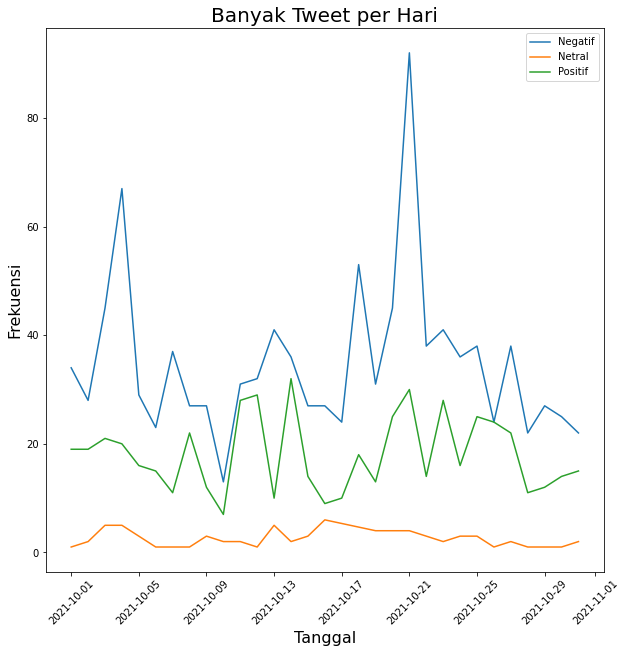

In [444]:
# Plotting line
plt.figure(figsize = (10,10))
sns.lineplot(x='Tanggal',y='Frekuensi',hue='sentiment',data=sent)
plt.title('Banyak Tweet per Hari',fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Tanggal',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.legend(['Negatif','Netral','Positif'])
plt.show()

### Customer Service

In [445]:
datacs = data.copy()

In [446]:
# labels = {'layanan' : 'Customer Service',
#           'nomor internet': 'Customer Service',
#           'nomor aktif': 'Customer Service', 
#           'mohon maaf': 'Customer Service', 
#           'dibantu respon': 'Customer Service',
#           'IndiHomeCare' : 'Customer Service'}
 
labels = {'IndiHomeCare' : 'Customer Service',
          'Telkomsel' : 'Customer Service'}

def matcher(k):
    x = (i for i in labels if i in k.split(' '))
    return ' | '.join(map(labels.get, x))

datacs['kata_kunci'] = datacs['User ID'].map(matcher)
# datacs['kata_kunci'] = datacs['Data Teks_Stemming'].map(matcher)

In [447]:
datacs = datacs.drop(datacs[datacs.kata_kunci == ''].index) #menghapus baris kosong
datacs.to_csv('E:\Program\[2] Program\AnSent\Data\Data_7_Relev\IndiHome\Id_2_CS.csv')

#### visualisasi

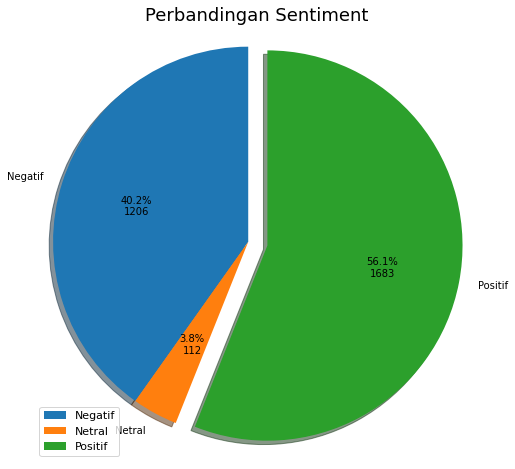

In [448]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)

sentimen = datacs['Data Teks_Stopword'].groupby(datacs['sentimen']).count().values

plt.figure(figsize = (8,8))
plt.pie(sentimen, explode=(0,0,0.1), labels=['Negatif', 'Netral','Positif'], shadow=True,
        autopct=lambda pct: pct_pie(pct, sentimen),startangle=90)
plt.title('Perbandingan Sentiment',fontsize=18)
plt.axis('equal')
plt.legend(fontsize=11)
plt.show()

In [449]:
# Melihat banyak Tweet perhari berdasarkan sentiment
datacs['Tanggal'] = pd.to_datetime(datacs['Tanggal'])
tph = datacs['Data Teks_Stopword'].groupby([datacs['Tanggal'].dt.date, datacs['sentimen']]).count()
frek = tph.values

# To Data Frame
tanggal = [ i for i, j in tph.index.tolist() ]
senti = [ j for i, j in tph.index.tolist() ]
sent = pd.DataFrame({'Tanggal':tanggal,'sentiment':senti, 'Frekuensi':frek})

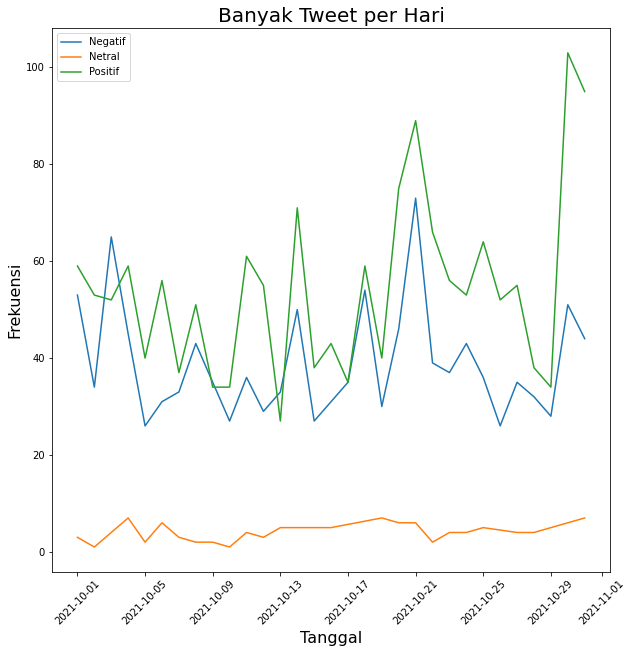

In [450]:
# Plotting line
plt.figure(figsize = (10,10))
sns.lineplot(x='Tanggal',y='Frekuensi',hue='sentiment',data=sent)
plt.title('Banyak Tweet per Hari',fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Tanggal',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.legend(['Negatif','Netral','Positif'])
plt.show()

### Information Quality

In [451]:
dataiq = data.copy()

In [452]:
labels = {'semangat': 'Information Quality',
          'digital' : 'Information Quality',
          'muda' : 'Information Quality'} 

def matcher(k):
    x = (i for i in labels if i in k.split(' '))
    return ' | '.join(map(labels.get, x))

dataiq['kata_kunci'] = dataiq['Data Teks_Stemming'].map(matcher)


In [453]:
dataiq = dataiq.drop(dataiq[dataiq.kata_kunci == ''].index) #menghapus baris kosong
dataiq.to_csv('E:\Program\[2] Program\AnSent\Data\Data_7_Relev\IndiHome\Id_3_IQ.csv')

#### visualisasi

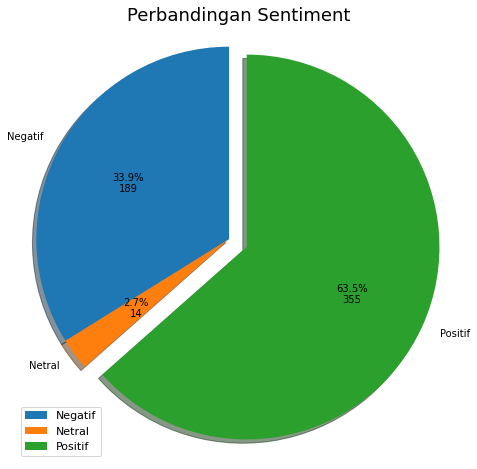

In [454]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)

sentimen = dataiq['Data Teks_Stopword'].groupby(dataiq['sentimen']).count().values

plt.figure(figsize = (8,8))
plt.pie(sentimen, explode=(0,0,0.1), labels=['Negatif', 'Netral','Positif'], shadow=True,
        autopct=lambda pct: pct_pie(pct, sentimen),startangle=90)
plt.title('Perbandingan Sentiment',fontsize=18)
plt.axis('equal')
plt.legend(fontsize=11)
plt.show()

In [455]:
# Melihat banyak Tweet perhari berdasarkan sentiment
dataiq['Tanggal'] = pd.to_datetime(dataiq['Tanggal'])
tph = dataiq['Data Teks_Stopword'].groupby([dataiq['Tanggal'].dt.date, dataiq['sentimen']]).count()
frek = tph.values

# To Data Frame
tanggal = [ i for i, j in tph.index.tolist() ]
senti = [ j for i, j in tph.index.tolist() ]
sent = pd.DataFrame({'Tanggal':tanggal,'sentiment':senti, 'Frekuensi':frek})

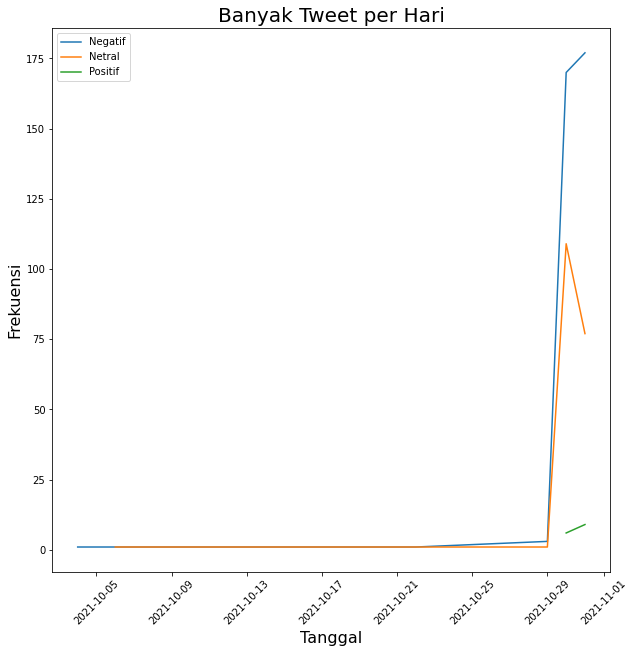

In [456]:
# Plotting line
plt.figure(figsize = (10,10))
sns.lineplot(x='Tanggal',y='Frekuensi',hue='sentiment',data=sent)
plt.title('Banyak Tweet per Hari',fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Tanggal',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.legend(['Negatif','Netral','Positif'])
plt.show()

### Security and Privacy

In [457]:
datasp = data.copy()

In [458]:
labels = {'via': 'Security dan Privacy',
          'pesan' : 'Security dan Privacy'} 

def matcher(k):
    x = (i for i in labels if i in k.split(' '))
    return ' | '.join(map(labels.get, x))

datasp['kata_kunci'] = datasp['Data Teks_Stemming'].map(matcher)

In [459]:
datasp = datasp.drop(datasp[datasp.kata_kunci == ''].index) #menghapus baris kosong
datasp.to_csv('E:\Program\[2] Program\AnSent\Data\Data_7_Relev\IndiHome\Id_4_SP.csv')

#### visualisasi

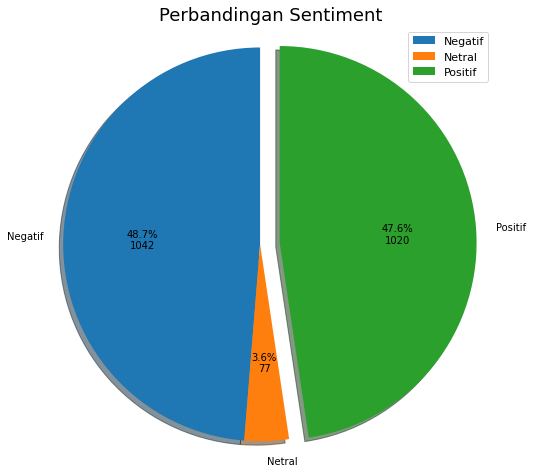

In [460]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)

sentimen = datasp['Data Teks_Stopword'].groupby(datasp['sentimen']).count().values

plt.figure(figsize = (8,8))
plt.pie(sentimen, explode=(0,0,0.1), labels=['Negatif', 'Netral','Positif'], shadow=True,
        autopct=lambda pct: pct_pie(pct, sentimen),startangle=90)
plt.title('Perbandingan Sentiment',fontsize=18)
plt.axis('equal')
plt.legend(fontsize=11)
plt.show()

In [461]:
# Melihat banyak Tweet perhari berdasarkan sentiment
datasp['Tanggal'] = pd.to_datetime(datasp['Tanggal'])
tph = datasp['Data Teks_Stopword'].groupby([datasp['Tanggal'].dt.date, datasp['sentimen']]).count()
frek = tph.values

# To Data Frame
tanggal = [ i for i, j in tph.index.tolist() ]
senti = [ j for i, j in tph.index.tolist() ]
sent = pd.DataFrame({'Tanggal':tanggal,'sentiment':senti, 'Frekuensi':frek})

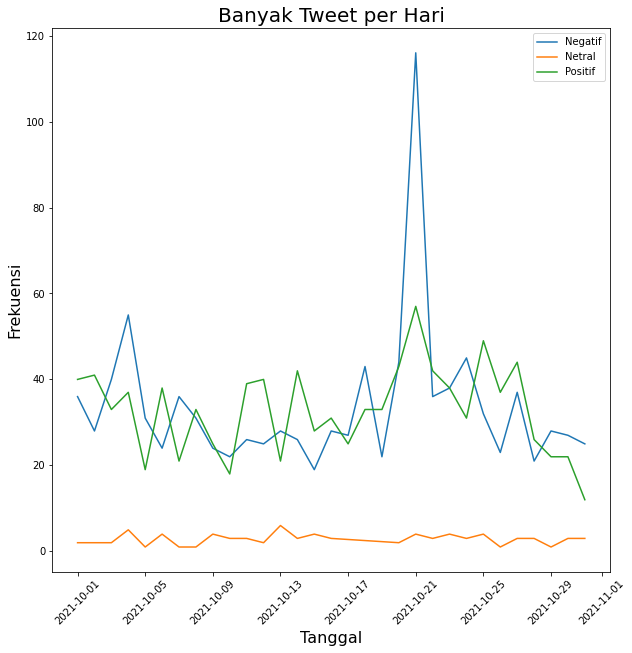

In [462]:
# Plotting line
plt.figure(figsize = (10,10))
sns.lineplot(x='Tanggal',y='Frekuensi',hue='sentiment',data=sent)
plt.title('Banyak Tweet per Hari',fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Tanggal',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.legend(['Negatif','Netral','Positif'])
plt.show()